Problem Statement:
Using the given wine information, Perform a clustering analysis to determine the clusters based on the similar characteristics of the data. And use classification algorithms to predict the labels of the clusters.

In-class Assignment Expectations/Steps -

Part 1: 
●Load the data using the Python Pandas library.

●Do an Exploratory Data Analysis of the data and state your insights.
Part 2: 
●Exclude the target variable 
●Perform Kmeans, Agglomerative clustering, PCA, and build a classification model of the clusters.
●Evaluation of the model and provide inferences.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('wine-clustering.csv')
df.head(30)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [5]:
df.shape

(178, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
df.isnull().sum().sum()

0

In [9]:
# priline as targetvar

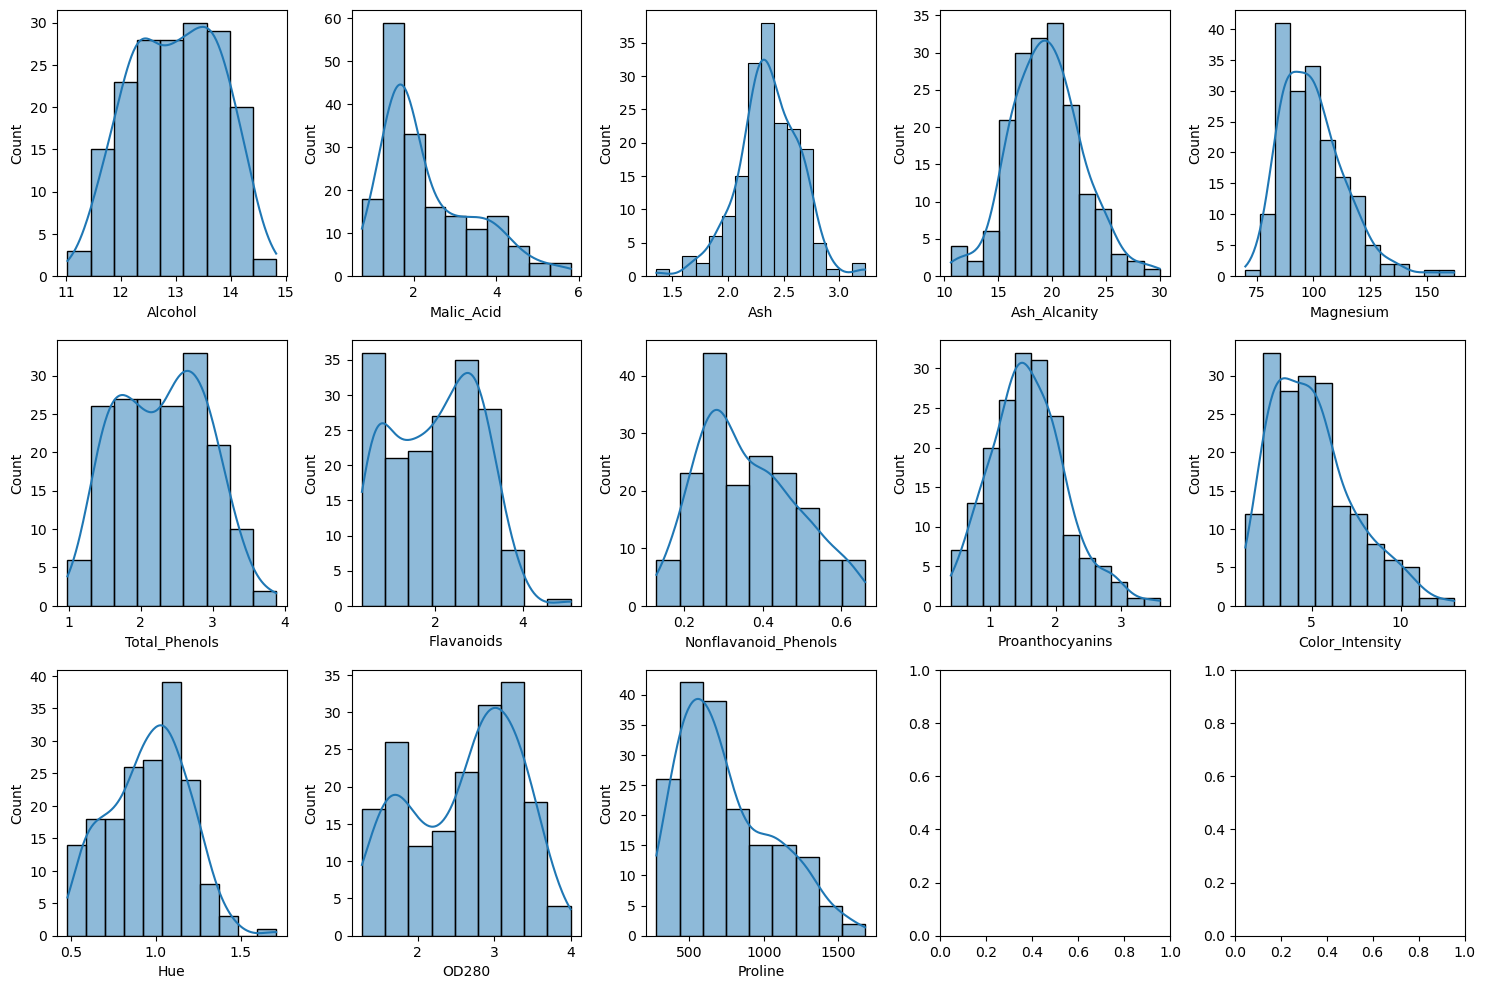

In [10]:
cols = df.columns

# index_y = np.where(cols == 'Proline')
# cols = np.delete(cols,index_y)

fig, ax = plt.subplots(3,5,figsize = (15,10))

for i, subplot in zip(cols,ax.flatten()):
    sns.histplot(df[i], ax=subplot,kde=True)

plt.tight_layout()
plt.show()

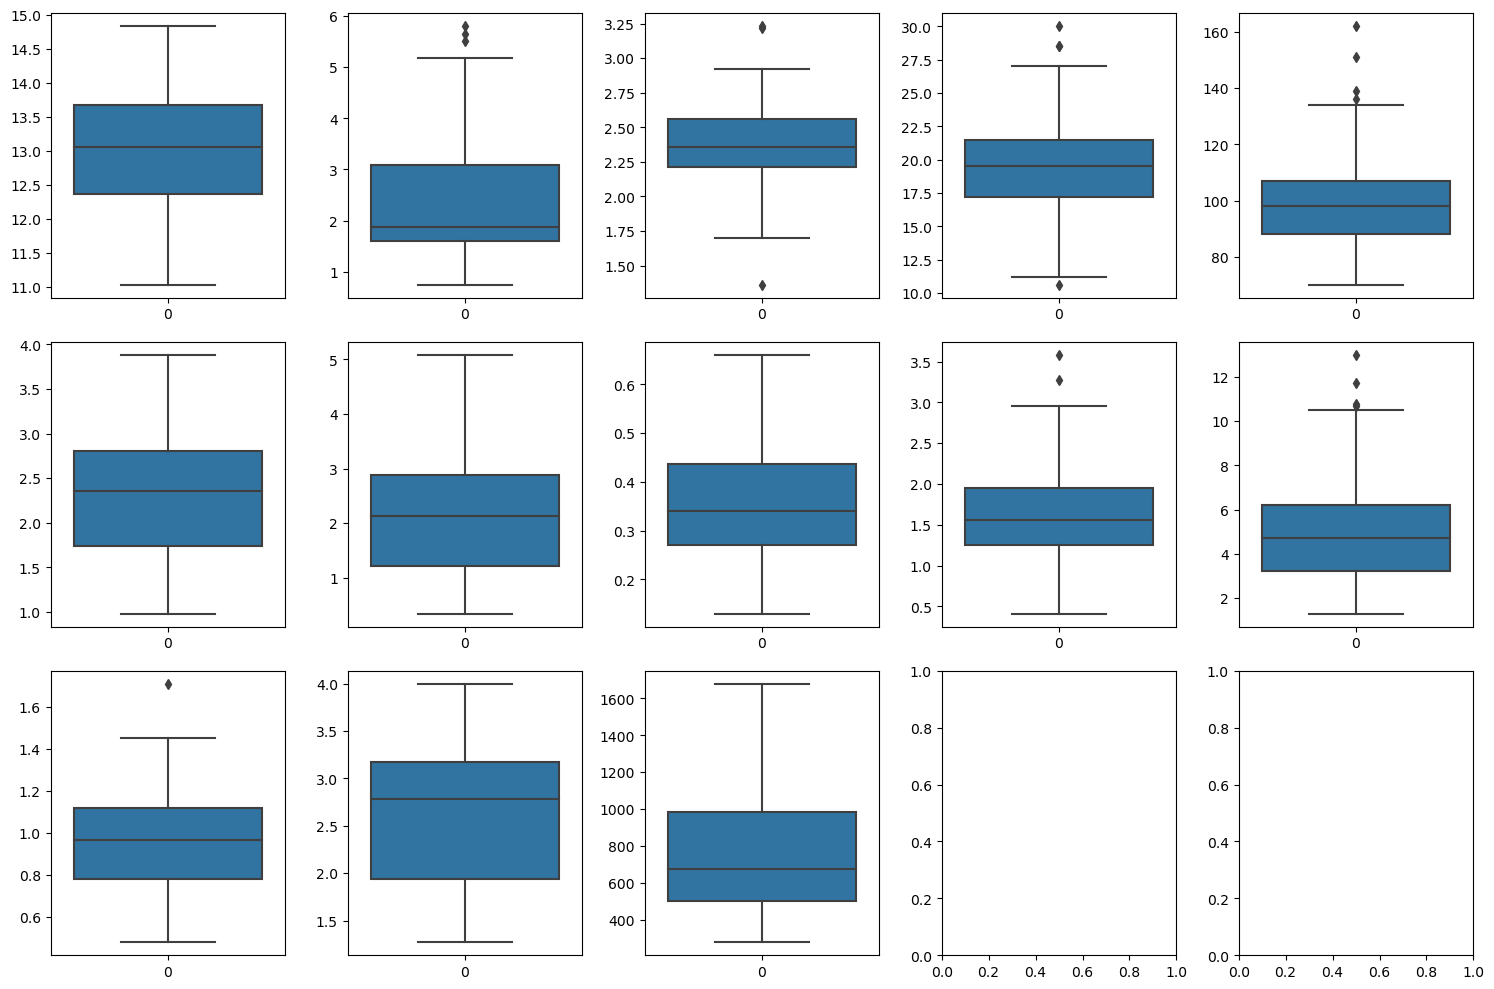

In [11]:
cols = df.columns

# index_y = np.where(cols == 'Proline')
# cols = np.delete(cols,index_y)

fig, ax = plt.subplots(3,5,figsize = (15,10))

for i, subplot in zip(cols,ax.flatten()):
    sns.boxplot(df[i], ax=subplot)

plt.tight_layout()
plt.show()

In [12]:
from sklearn.cluster import KMeans

# Choose the number of clusters (n_clusters)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

# Add cluster labels to the original dataset
df['KMeans_Cluster'] = kmeans.labels_


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
df['KMeans_Cluster'].value_counts()

2    69
0    62
1    47
Name: KMeans_Cluster, dtype: int64

In [14]:
from sklearn.cluster import AgglomerativeClustering

# Choose the number of clusters (n_clusters)
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(df)

# Add cluster labels to the original dataset
df['Agglomerative_Cluster'] = agglomerative.labels_


In [15]:
df['Agglomerative_Cluster'].value_counts()

1    72
2    58
0    48
Name: Agglomerative_Cluster, dtype: int64

In [16]:
from sklearn.decomposition import PCA

# Perform PCA with desired number of components (n_components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

# Add PCA components to the original dataset
df['PCA_Component1'] = X_pca[:, 0]
df['PCA_Component2'] = X_pca[:, 1]


In [17]:
pca.explained_variance_ratio_

array([0.99808056, 0.00173632])

In [18]:
# Since target variable is not given in dataset it is not possbilbe to evaluate the model